In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import nltk
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import re

In [108]:
con = sqlite3.connect('database.sqlite')

In [109]:
data = pd.read_sql_query("""SELECT * FROM Reviews""", con)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [110]:
data.shape

(568454, 10)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [112]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


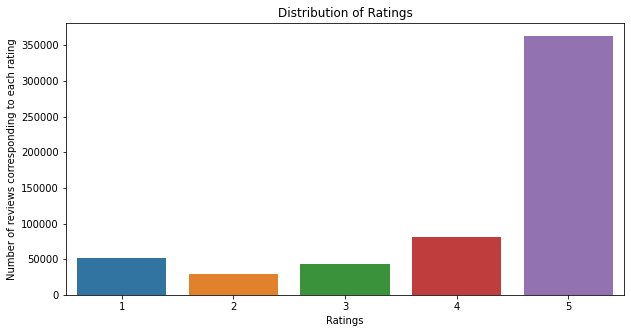

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64


In [113]:
plt.figure(figsize=(10,5))
sns.countplot(data['Score'])
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of reviews corresponding to each rating")
plt.show()

print(data['Score'].value_counts())

In [114]:
filtered_data = pd.read_sql_query("""SELECT * FROM Reviews WHERE Score != 3""", con)
def partition(X):
    if X < 3:
        return 'negative'
    return 'positive'

filtered_data['Score'] = filtered_data['Score'].map(partition)

In [115]:
print(filtered_data.shape)
filtered_data.head()

(525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [116]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525814 entries, 0 to 525813
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      525814 non-null  int64 
 1   ProductId               525814 non-null  object
 2   UserId                  525814 non-null  object
 3   ProfileName             525814 non-null  object
 4   HelpfulnessNumerator    525814 non-null  int64 
 5   HelpfulnessDenominator  525814 non-null  int64 
 6   Score                   525814 non-null  object
 7   Time                    525814 non-null  int64 
 8   Summary                 525814 non-null  object
 9   Text                    525814 non-null  object
dtypes: int64(4), object(6)
memory usage: 40.1+ MB


In [117]:
filtered_data.duplicated(subset = {"UserId", "ProfileName", "Time","Text"}).value_counts()

False    364173
True     161641
dtype: int64

In [118]:
final = filtered_data.drop_duplicates(subset = {"UserId", "Text"})

In [119]:
final.shape

(363859, 10)

In [120]:
final[final['HelpfulnessNumerator']> final['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
41159,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,positive,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
59301,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,positive,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [121]:
final = final[final['HelpfulnessNumerator']<= final['HelpfulnessDenominator']]

In [122]:
final.shape

(363857, 10)

In [123]:
final['Score'].value_counts()

positive    306779
negative     57078
Name: Score, dtype: int64

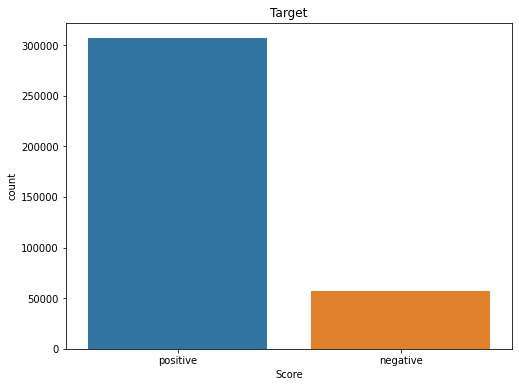

In [124]:
plt.figure(figsize=(8,6))
sns.countplot(final['Score'])
plt.title('Target')
plt.show()

In [125]:
import re
def removeHtml(sentence): 
    pattern = re.compile('<.*?>')
    cleaned_text = re.sub(pattern,' ',sentence)
    return cleaned_text

In [126]:
def removePunctuations(sentence):
    cleaned_text  = re.sub('[^a-zA-Z]',' ',sentence)
    return (cleaned_text)

In [127]:
def removeNumbers(sentence):
    sentence = re.sub("\S*\d\S*", " ", sentence).strip()
    return (sentence)

In [128]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [129]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'because', 'if', 'have', "wasn't", 'than', "you've", 'did', 'when', 'at', 'over', 'below', 'only', 'has', 'most', 'of', 'hadn', 'out', 'those', "didn't", 'more', "don't", 'being', 'd', 'but', 're', "hasn't", 'been', 'to', 'me', "doesn't", 'her', 'm', 'where', 'an', 'am', 'own', 'mustn', 'what', 'do', 'it', 'myself', 'its', 'on', 'some', "shan't", 'theirs', 's', "that'll", 'about', 'll', 'again', "needn't", 'such', 'hers', 'off', 'further', 'was', "wouldn't", "she's", 'don', 'ain', 'aren', 'mightn', 'their', 'we', 'ourselves', 'he', 'why', 'very', 'while', 'y', 'other', 'weren', 'by', 'our', 'they', 'once', 'isn', 'few', 'how', 've', 'she', 'from', 'couldn', 'these', 'should', 'so', 'all', 'which', 'yourself', "isn't", 'a', 'now', 'wouldn', 'ma', 'under', 'yours', 'didn', 'any', 'shouldn', "you'll", 'above', 'is', 'and', 'the', "mustn't", 'through', "couldn't", 'shan', 'your', 'i', 'his', 'both', 'won', 'there', "should've", 'itself', 'here', "weren't", "you're", 'herself', 'into', 'wa

In [130]:

default_stopwords = set(stopwords.words('english'))
excluding = set(['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])

custom_stopwords = default_stopwords - excluding

print(custom_stopwords)

{'because', 'if', 'have', 'than', "you've", 'did', 'when', 'at', 'over', 'below', 'only', 'has', 'most', 'of', 'out', 'those', 'more', 'being', 'd', 'but', 're', 'been', 'to', 'me', 'her', 'm', 'where', 'an', 'am', 'own', 'what', 'do', 'it', 'myself', 'its', 'on', 'some', "shan't", 'theirs', 's', "that'll", 'about', 'll', 'again', 'such', 'hers', 'off', 'further', 'was', "she's", 'their', 'we', 'ourselves', 'he', 'why', 'very', 'while', 'y', 'other', 'by', 'our', 'they', 'once', 'few', 'how', 've', 'she', 'from', 'these', 'should', 'so', 'all', 'which', 'yourself', 'a', 'now', 'ma', 'under', 'yours', 'any', "you'll", 'above', 'is', 'and', 'the', 'through', 'shan', 'your', 'i', 'his', 'both', 'there', "should've", 'itself', 'here', "you're", 'herself', 'into', 'who', 'them', 'then', 'will', 'o', 'ours', 't', 'my', 'does', 'before', 'you', 'him', "you'd", 'for', 'be', 'himself', 'were', 'no', 'doing', 'this', 'as', 'until', 'down', 'too', 'can', 'yourselves', 'in', 'whom', 'between', 'af

In [131]:
sno = nltk.stem.SnowballStemmer('english')

In [132]:
from tqdm import tqdm

In [133]:
preprocessed_reviews = []
all_positive_words=[] 
all_negative_words=[]
 
count=0 
string=' '    
stemed_word=' '

for review in tqdm(final['Text'].values):
    filtered_sentence=[]
    review = removeNumbers(review)
    review = removeHtml(review)
    review = removePunctuations(review)
        
    for cleaned_words in review.split():   
        if((cleaned_words not in custom_stopwords)):
            stemed_word=(sno.stem(cleaned_words.lower()))                                   
            filtered_sentence.append(stemed_word)
            if (final['Score'].values)[count] == 'Positive': 
                all_positive_words.append(stemed_word) 
            if(final['Score'].values)[count] == 'Negative':
                all_negative_words.append(stemed_word) 
        else:
            continue
    review = " ".join(filtered_sentence)     
    preprocessed_reviews.append(review.strip()) 
    count+=1
    
import pickle
with open('all_positive_words.pkl', 'wb') as file:
    pickle.dump(all_positive_words, file)
    
with open('all_negative_words.pkl', 'wb') as file:
    pickle.dump(all_negative_words, file)
    
final['CleanedText']=preprocessed_reviews 
    
print("The length of the data corpus is : {}".format(len(preprocessed_reviews)))


100%|█████████████████████████████████████████████████████████████████████████| 363857/363857 [07:13<00:00, 839.14it/s]

The length of the data corpus is : 363857


In [134]:
final.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i bought sever vital can dog food product foun...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut peanut a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this confect around centuri it light pillowi c...


In [135]:

conn = sqlite3.connect('final.sqlite')
c=conn.cursor()
conn.text_factory = str
final.to_sql('Reviews', conn,  schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)